# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

# Load  & Merge Data

In [2]:
# Load all datafiles
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Merge Features with Train and Test Data
train = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
test = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='left')

In [4]:
# Merge Stores with Train and Test Data
train = pd.merge(train, stores, on='Store', how='left')
test = pd.merge(test, stores, on='Store', how='left')

In [5]:
# Move target column to the end
target = train.pop('Weekly_Sales')
train['Weekly_Sales'] = target

In [6]:
train.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50
1,1,1,2010-02-12,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,46039.49
2,1,1,2010-02-19,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,41595.55
3,1,1,2010-02-26,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,19403.54
4,1,1,2010-03-05,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,21827.90


# Generate EDA with ydata profiling

In [7]:
#!pip install ydata-profiling

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Sales Forecasting Description", explorative=True)
# Display in Jupyter notebook
profile.to_notebook_iframe()
# Save EDA as HTML
profile.to_file("SalesForecastingDescriptionEDA.html")

# Visualization

In [9]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()

print(f'Numerical Columns: {num_cols}')
print(f'Categorical Columns: {cat_cols}')

target = 'Weekly_Sales'

Numerical Columns: ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Weekly_Sales']
Categorical Columns: ['Date', 'Type']


## Univariate Analysis

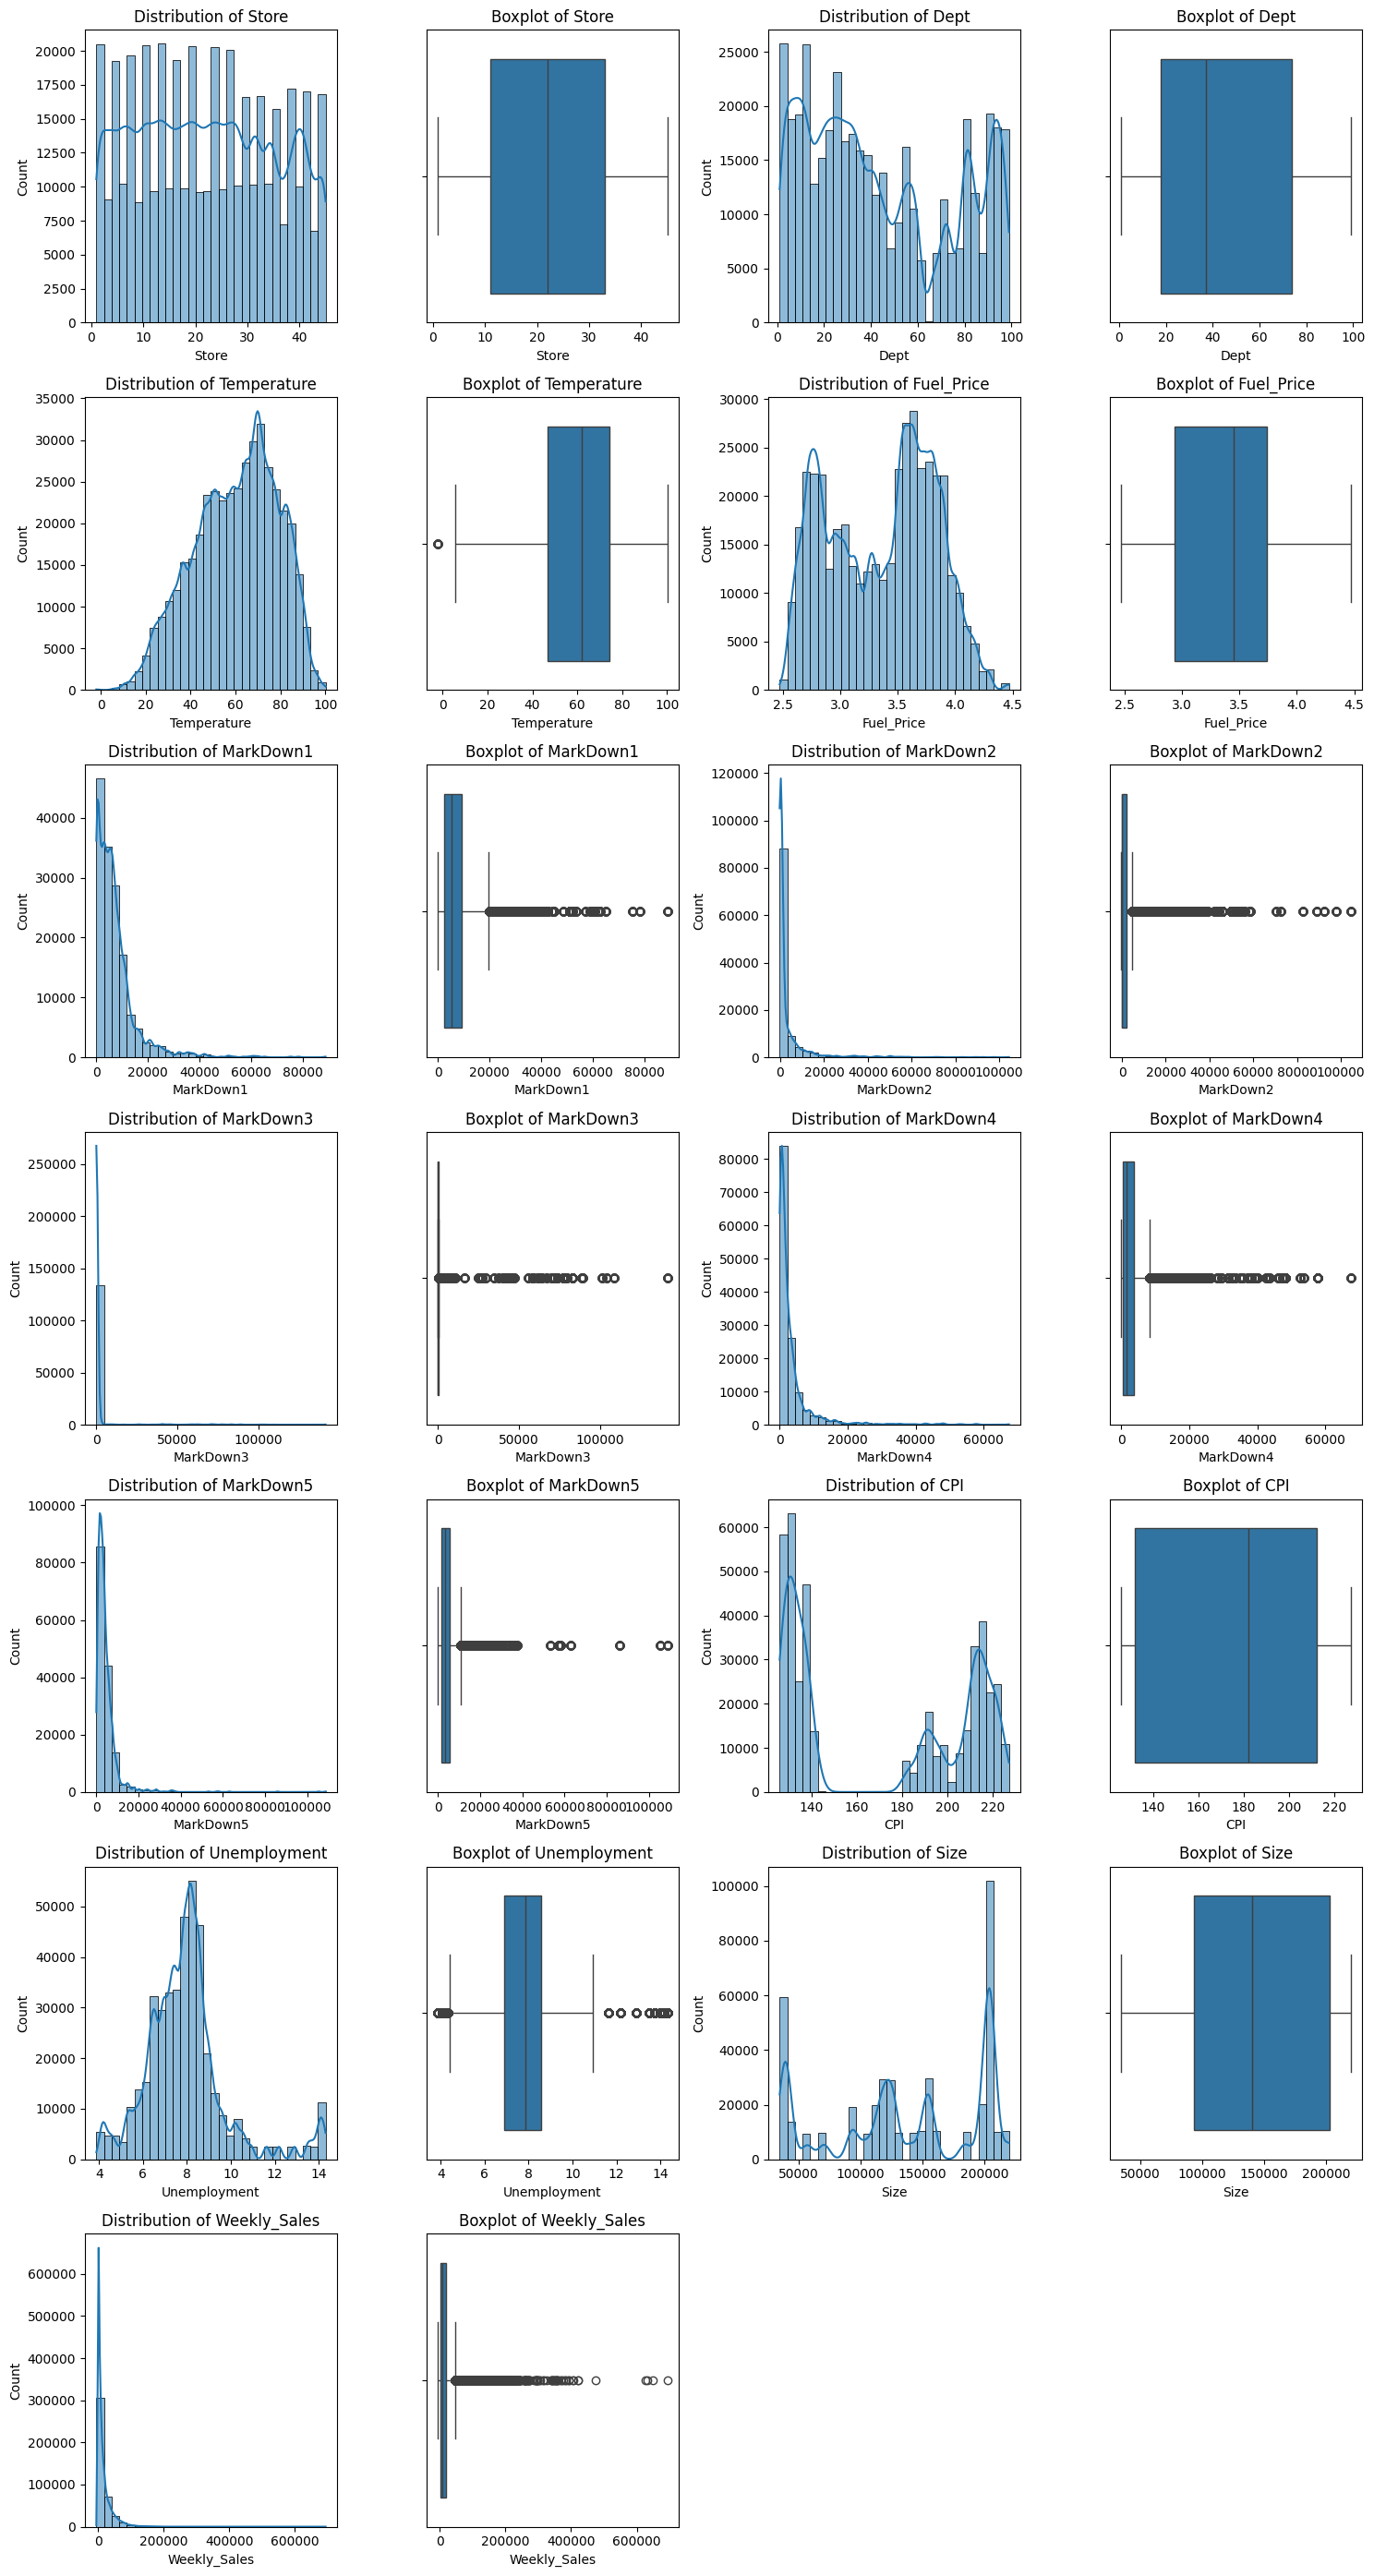

In [10]:
# Visualization of Numerical Features
plots_per_row = 4
n = len(num_cols) * 2
rows = math.ceil(n / plots_per_row)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(train[col], kde=True, bins=30, ax=axes[2*i])
    axes[2*i].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=train[col], ax=axes[2*i+1])
    axes[2*i+1].set_title(f"Boxplot of {col}")

# Hide unused subplots
for j in range(2*len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

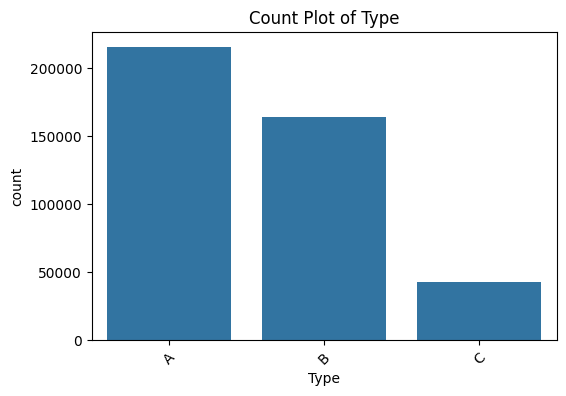

In [11]:
# Visualization of Categorical Features
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Type')
plt.title(f'Count Plot of Type')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

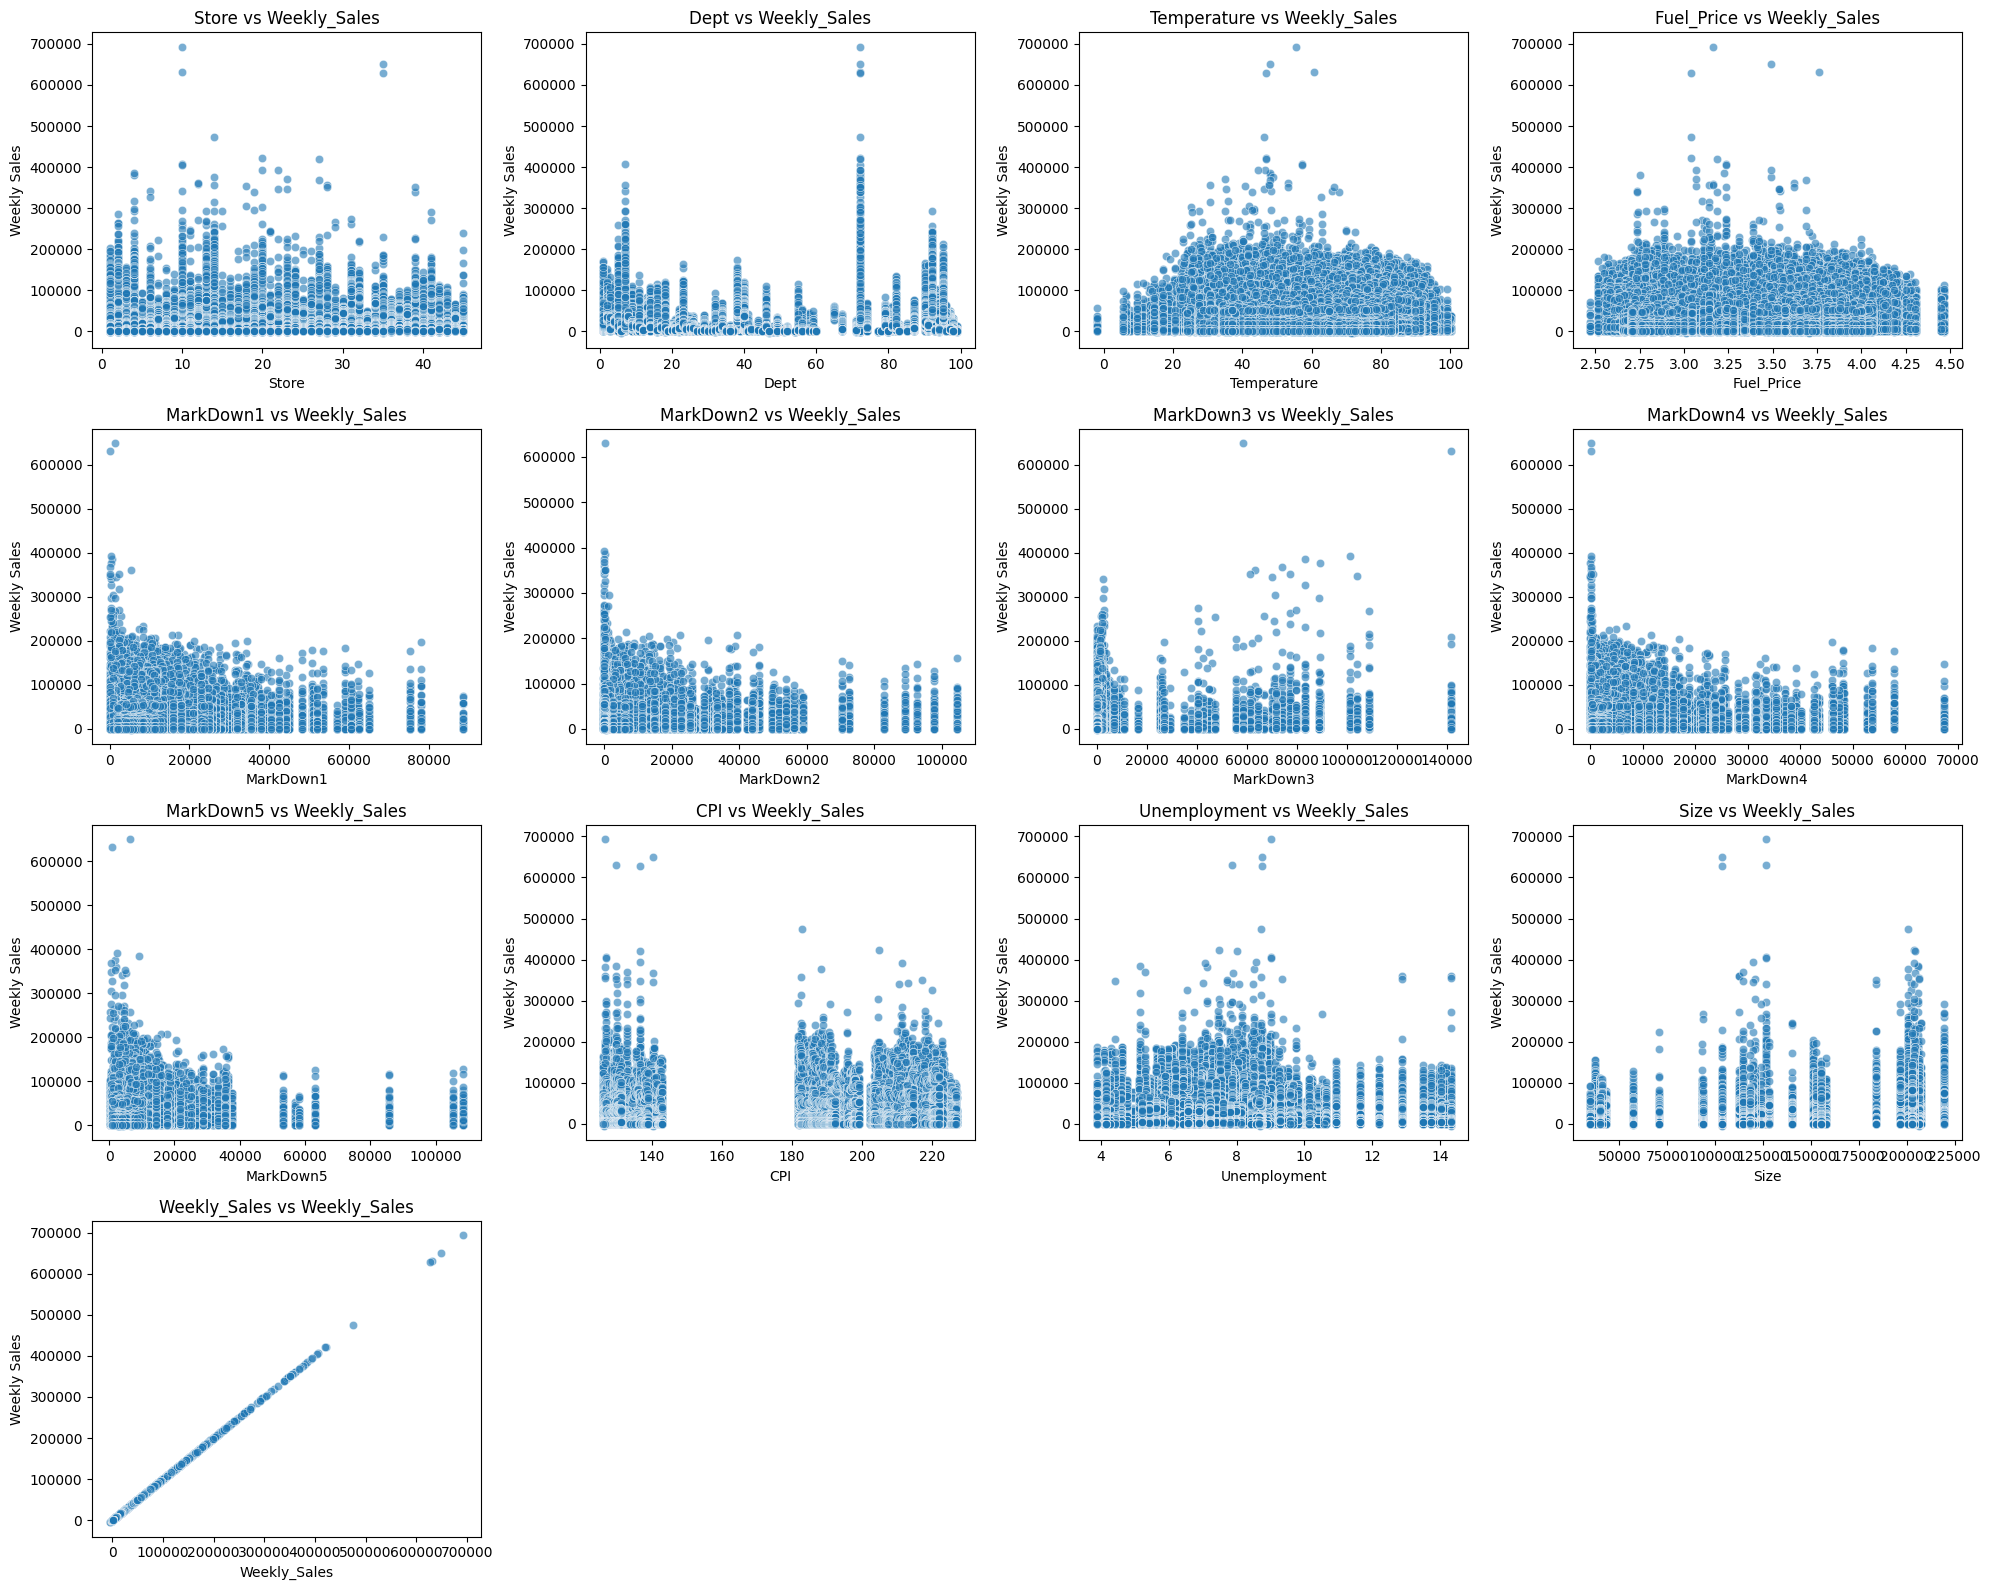

In [12]:
# Numerical vs Target Variable
plots_per_row = 4
rows = math.ceil(len(num_cols) / plots_per_row)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=train, x=col, y='Weekly_Sales', ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{col} vs Weekly_Sales")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Weekly Sales")

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

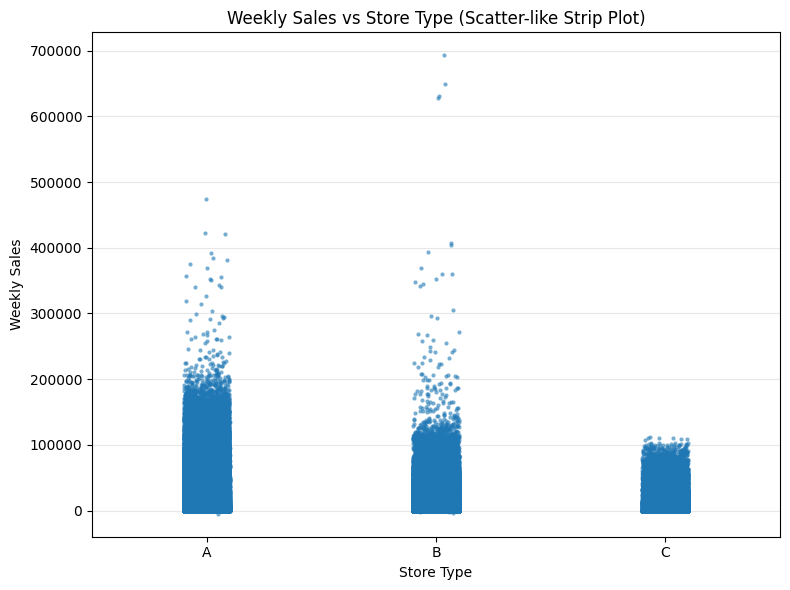

In [13]:
# Categorical vs Target Variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=train, x='Type', y='Weekly_Sales', jitter=True, alpha=0.6, size=3)
plt.title('Weekly Sales vs Store Type (Scatter-like Strip Plot)')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Multivariate Analysis

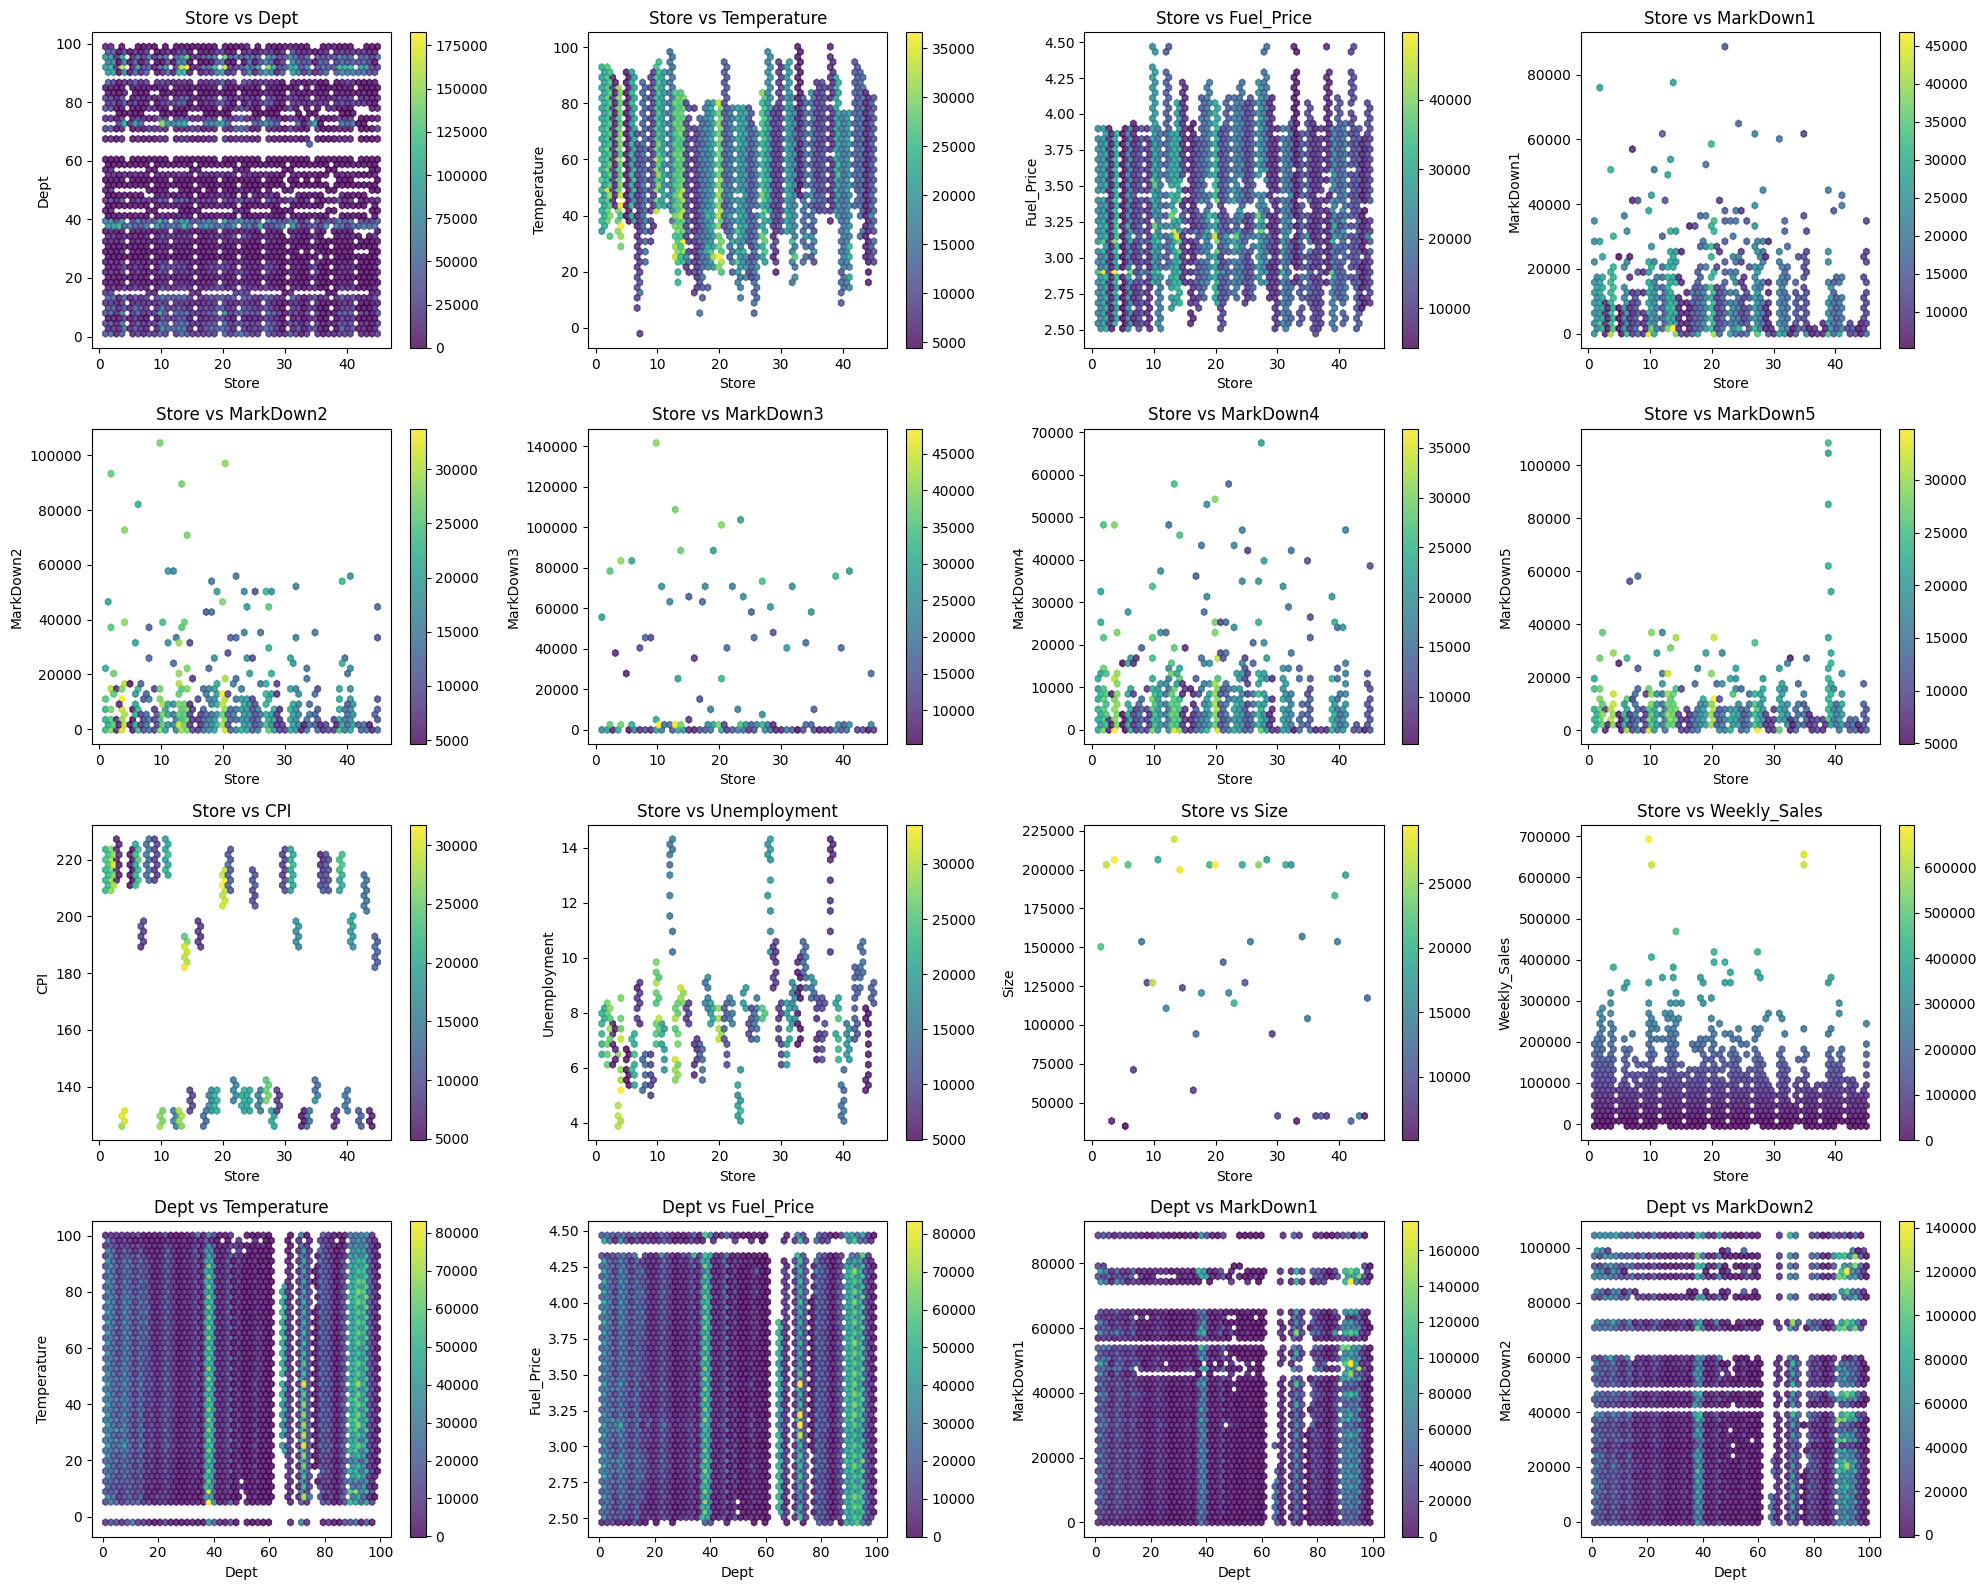

In [16]:
# Numerical vs Numerical Features
num_pairs = [(c1, c2) for i, c1 in enumerate(num_cols) for c2 in num_cols[i+1:]]

top_n = min(16, len(num_pairs))
num_pairs = num_pairs[:top_n]

plots_per_row = 4
nrows = math.ceil(len(num_pairs) / plots_per_row)
fig, axes = plt.subplots(nrows, plots_per_row, figsize=(20, nrows * 4))
axes = axes.flatten()

for idx, (col1, col2) in enumerate(num_pairs):
    hb = axes[idx].hexbin(train[col1], train[col2], C=train[target] if target in train.columns else None,cmap='viridis', gridsize=50, alpha=0.8)
    axes[idx].set_xlabel(col1)
    axes[idx].set_ylabel(col2)
    axes[idx].set_title(f"{col1} vs {col2}")

    # Add colorbar
    plt.colorbar(hb, ax=axes[idx])

for idx in range(len(num_pairs), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Load Mergerd data into files

In [20]:
train.to_csv('Merged_Train.csv', index=False)
test.to_csv('Merged_Test.csv', index=False)